# K-means (K-ortamalar)

* **Amaç veri setindeki gözlemleri birbirlerine olan benzerliklerine göre ayırmaktır. Her küme içerisinde homojen, her küme birbirleri ile heterojen yapıdadır.**

1. Adım = Küme sayısı seçilir.
2. Adım = Rastgele K merkez noktası seçilir.
3. Adım = Gözlemler bu merkezlere uzaklıkları hesaplanır.
4. Adım = Yakın olan merkeze gözlemler atanır.
5. Adım = Atama işlemlerinden sonra tekrardan merkeze olan uzaklıkları hesaplanır
6. Adım = Bu işlem küme içi hata kareler toplamının toplamı min olduğu durumdaki kümelenme yapısı nihai kümelenme olarak seçilir.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans  #k-ortalamalar kutuphanesi

#hatalar gözükmemesi için
import warnings 
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [23]:
df = pd.read_csv("USAArrest.csv",index_col = 0)  #sıfırıncı değişken index olarak ele almak istersek index_col = (columns sayısı)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [25]:
df.isnull().sum()   #eksik gözlem bulunmamaktadır.

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

* **İş amacı : Amerikadaki eyaletlerin suc işleme oranları eski veri setimizde mevcut. Amerikanın eyaletlerini suç istatistiklerine göre segmentlere kümelere ayırmak böylece kümelere ayrılmış eyaletlere yaptırım ağırlığı belirlenebilir.**

In [24]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### Model & Kümeleme

In [27]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)

In [28]:
#küme sayısını öğrenme
k_fit.n_clusters

3

In [34]:
#merkezlere erişmek için
k_fit.cluster_centers_

array([[  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  4.27      ,  87.55      ,  59.75      ,  14.39      ]])

In [35]:
#gözlemlerin hangi clustera ait olduğunu öğrenmek istersek
k_fit.labels_

array([1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2,
       2, 0, 0, 2, 2, 0])

### Kümelerin Görselleştirilmesi

In [36]:
k_means = KMeans(n_clusters = 3).fit(df)

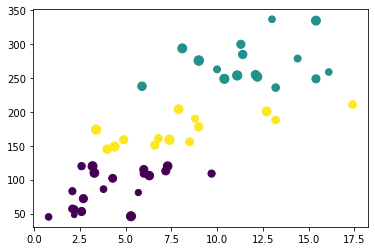

In [40]:
#gözlemlerin kümelenmelerini bir grafik üzerinde görmek istersek
plt.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c = k_means.labels_, cmap = "viridis")

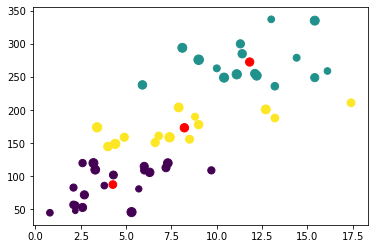

In [49]:
#Küme merkezlerini grafik üzerine eklemek istersek
merkezler = k_means.cluster_centers_
plt.scatter(merkezler[:,0], merkezler[:,1], merkezler[:,2], c= "red", alpha = 1)

plt.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c = k_means.labels_, cmap = "viridis")

## Optimum Küme sayısının belirlenmesi

### Elbow Yöntemi

In [58]:
k_means= KMeans().fit(df)

k_means.inertia_
#her bir gözlem için kendi kümeleri içinde merkez noktalara olan uzaklıkların toplamını vermektedir.

SyntaxError: invalid syntax (<ipython-input-58-9c7e7bac1c00>, line 1)

In [59]:
ssb=[]
K = range(1,30)

for k in K:
    k_means = KMeans(n_clusters = k).fit(df)
    ssb.append(k_means.inertia_)

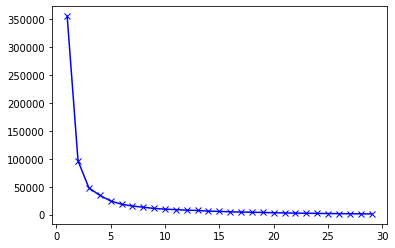

In [64]:
plt.plot(K, ssb,"bx-")

* **Kümeleme sayısı gözlem sayısından az olmalıdır.**
* **eğimin düşük olan nokta ve kümeleme sayısının en düşük olduğu nokta optimum nokta olarak seçilebilir.(Dirsek ucu)**

### Alternatif : yellowbrick

In [69]:
!pip install yellowbrick

In [70]:
from yellowbrick.cluster import KElbowVisualizer

In [71]:
kmeans = KMeans()

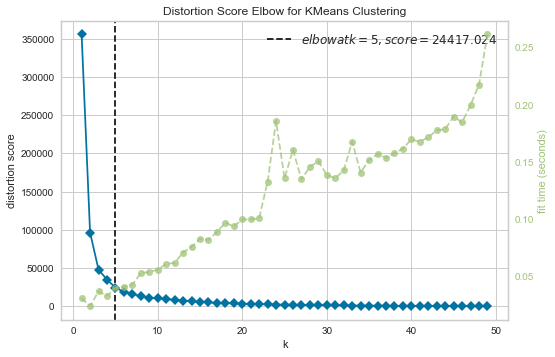

In [72]:
visu = KElbowVisualizer(kmeans, k = (1,50)).fit(df)
visu.poof()

* **Grafiğin sol üst köşesinde önerilen grup sayısı belirtilmektedir.**

In [74]:
#final model
k_tuned = KMeans(n_clusters = 5).fit(df)
kumeler = k_tuned.labels_

In [86]:
# son olarak kümelenmiş gözlemleri orjinal dataframmize eklememiz lazım
pd.DataFrame({"Eyaletler":df.iloc[:,0], 
             "Kume_No":kumeler})  #gözlemlerin küme halleri

df["Kume_No"] = kumeler
df.head()

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [93]:
message = "hello"
isFound = message.startswith("h")
isFound
message = message.center(50, " ")

In [94]:
message

'                      hello                       '